In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, freqz

<h2>Pembacaan File</h2>

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(io.StringIO(uploaded['data_1602_gyro_phone.txt'].decode('utf-8')))

Saving data_1602_gyro_phone.txt to data_1602_gyro_phone (2).txt


In [ ]:
df

,1602,A,99019678643841,-0.7197418,0.39865112,-0.16711426;
0,1602,A,99019728997845,-0.957825,1.615234,-0.111709595;
1,1602,A,99019779351849,-1.881058,1.473206,0.83522034;
2,1602,A,99019829705853,-1.575790,0.241714,0.34750366;
3,1602,A,99019880059857,-1.639481,1.097153,0.34846497;
4,1602,A,99019930413861,-1.467056,1.212112,0.29103088;
...,...,...,...,...,...,...
64280,1602,S,102369406041422,-0.140610,-0.012726,-0.0055389404;
64281,1602,S,102369456395426,-0.137192,0.174301,0.02243042;
64282,1602,S,102369506749430,-0.092834,0.320374,0.08155823;
64283,1602,S,102369557103434,-0.053207,0.368210,0.10652161;


<h2>Deklarasi Data</h2>

In [ ]:
#Assign dataset ke masing-masing kolom/variabel A,B,C,D,E,F

A = df.iloc[:, 0] #ID
B = df.iloc[:, 1] #Activity Code
C = df.iloc[:, 2] #Timestamp
D = df.iloc[:, 3] #Sumbu X
E = df.iloc[:, 4] #sumbu Y
F = df.iloc[:, 5] #sumbu Z


#karena datanya banyak, kita akan mengambil 500 data saja
D_1000 = D[500 : 1000] #Sumbu X baris 500 - 1000
E_1000 = E[500 : 1000] #Sumbu Y baris 500 - 1000
F_1000 = F[500 : 1000] #Sumbu Z baris 500 - 1000

<h2>MVA Filter</h2>

In [ ]:
#Mengembalikan MVA dari dataset
def MVA_Filter(data,window_size):
  hasil = data.rolling(window=window_size).mean()
  return hasil

Windows 10

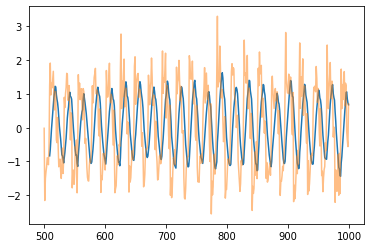

In [ ]:
MVA_Filter(E_1000,10).plot(label ='MVA')
plt.plot(E_1000, label='E', alpha = 0.5)
MVA_B = MVA_Filter(E_1000,50)

Windows 15

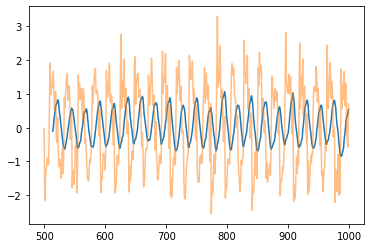

In [ ]:
MVA_Filter(E_1000,15).plot(label ='MVA')
plt.plot(E_1000, label='E', alpha = 0.5)
MVA_B = MVA_Filter(E_1000,50)

*Windows* 5

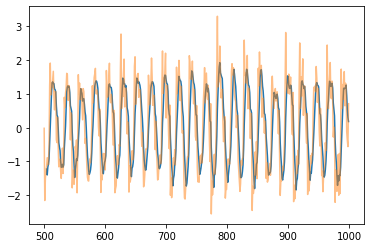

In [ ]:
MVA_Filter(E_1000,5).plot(label ='MVA')
plt.plot(E_1000, label='E', alpha = 0.5)
MVA_B = MVA_Filter(E_1000,50)

<h2>LPF Filter</h2>

In [50]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Filter requirements.
order = 6
fs = 30.0   # sample rate, per data
cutoff = 3.667  # cutoff frequency yang diinginkan dari filter

# ambil koefisiensi filter.
b, a = butter_lowpass(cutoff, fs, order)

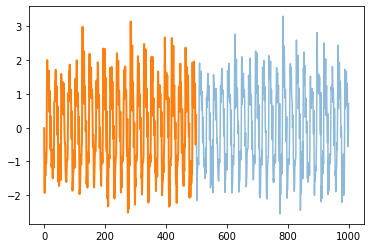

In [52]:
y = butter_lowpass_filter(E_1000, cutoff, fs, order)
plt.plot(E_1000, label='E', alpha = 0.5)
plt.plot(y, linewidth=2, label='filtered data')